In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tqdm import tqdm

In [2]:
df = pd.read_parquet('processed_data.parquet')
X, y = df.drop(columns='label'), df['label']

In [ ]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300, n_jobs=-1)
tsne_results = tsne.fit_transform(X)

In [ ]:
df['tsne_0'], df['tsne_1'] = tsne_results.T
df.head()

,label,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,tsne_0,tsne_1
66812,0,3.405352,-0.133571,0.022913,-0.656788,0.076587,-1.700207,-0.819912,0.225086,-0.306587,-0.567517,-0.105182,-0.090669,-0.012744,5.781015,-1.210747
26491,0,-6.135670,-0.950632,-1.297717,0.219088,0.041739,0.684836,0.246802,-0.349805,-0.559061,-0.274078,-0.342808,-0.085273,-0.018611,-8.229571,1.408012
56814,0,5.369586,0.137090,0.426693,-0.805127,0.490753,0.604057,-0.149051,0.276510,0.010877,0.378712,-0.531828,-0.469075,-0.354219,7.161136,0.790331
62888,0,2.679422,-1.730951,-1.150534,-0.729968,0.623516,-0.224546,-0.384776,0.615389,0.002588,-0.207686,-0.446293,-0.219902,-0.290937,2.301282,-4.524460
39233,0,1.892697,-1.829076,-0.262680,0.531497,-0.227475,0.394660,-0.851810,-0.221904,-0.278473,0.264628,-0.123632,-0.224816,-0.151866,1.837312,-2.223142


In [ ]:
spam_tsne = df[['tsne_0', 'tsne_1']].loc[df['label'] == 0]
ham_tsne = df[['tsne_0', 'tsne_1']].loc[df['label'] == 1]

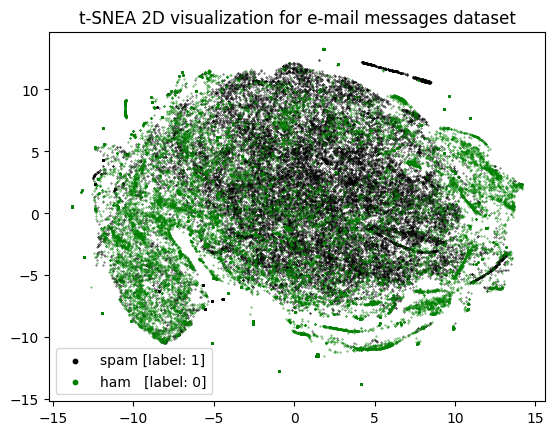

In [ ]:
plt.scatter(spam_tsne['tsne_0'], spam_tsne['tsne_1'], s=0.1, c='black')
plt.scatter(ham_tsne['tsne_0'], ham_tsne['tsne_1'], s=0.1, c='green')
plt.legend(['spam [label: 1]', 'ham   [label: 0]'], markerscale=10)
plt.title('t-SNEA 2D visualization for e-mail messages dataset')
plt.show()

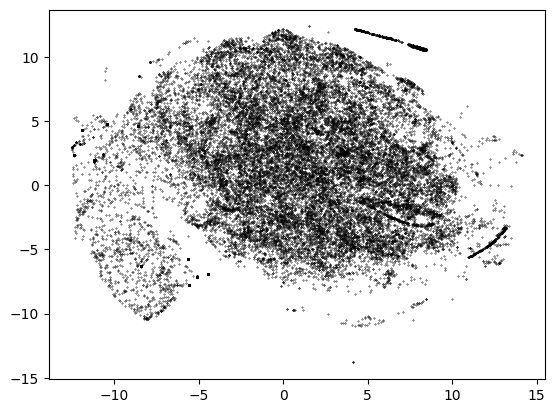

In [ ]:
plt.scatter(spam_tsne['tsne_0'], spam_tsne['tsne_1'], s=0.1, c='black')

In [ ]:
def draw_plot(df: pd.DataFrame, x_col, y_col, labels):
    groups = set(labels)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94','#f7b6d2', '#dbdb8d', '#9edae5', '#393b79', 'black', 'blue', 'green', 'red', 'magenta']

    plt.figure(figsize=(7,7))
    for group, color in zip(groups, colors):
        points = df[[x_col, y_col]].loc[labels == group]
        plt.scatter(points[x_col], points[y_col], s=0.1, c=color)

    plt.legend([i for i in range(len(groups))], markerscale=10, prop={'size': 9}, edgecolor='black',
    bbox_to_anchor=(1, 1.01), loc='upper left')
    plt.ylim((-11.5,14)) #plt.xlim((-14, 14))
    plt.show()

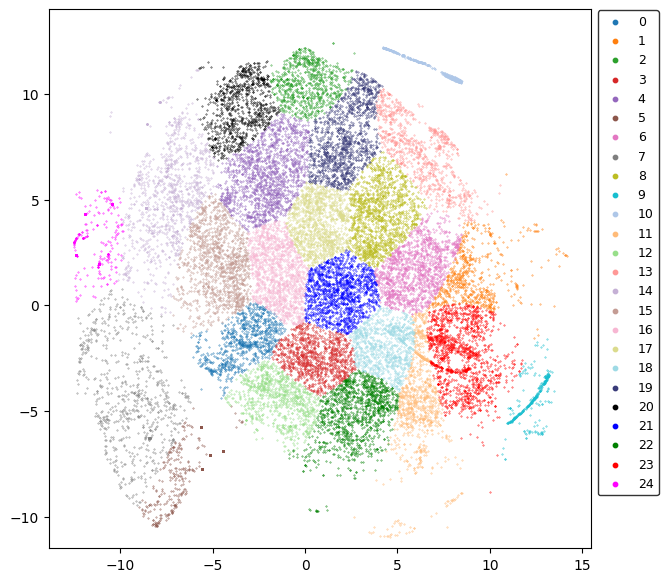

In [ ]:
from sklearn.mixture import GaussianMixture
gm_tsne = GaussianMixture(n_components=25, random_state=42).fit(spam_tsne)
draw_plot(spam_tsne, 'tsne_0', 'tsne_1', gm_tsne.predict(spam_tsne))

18, 7, 24, 14, 10, 16, 18 

In [ ]:
def draw_plot2(df: pd.DataFrame, x_col, y_col, labels, choosen):
    groups = set(labels)
    colors = ['blue', 'green', 'red', 'lightskyblue', 'darkorange', 'darkviolet', 'saddlebrown']
    i=0

    plt.figure(figsize=(7,7))
    for group in groups:
        points = df[[x_col, y_col]].loc[labels == group]
        if group in choosen:
            plt.scatter(points[x_col], points[y_col], s=0.1, c=colors[i], label=group)
            i+=1
        else: plt.scatter(points[x_col], points[y_col], s=0.1, c='black')
        

    plt.legend(markerscale=10)
    plt.title('t-SNE clustering for spam messages')
    plt.show()

In [ ]:
tsne_label = gm_tsne.predict(spam_tsne)
tsne_chosen = [7, 24, 13, 10, 14, 9, 5]
tsne_chosen.sort()

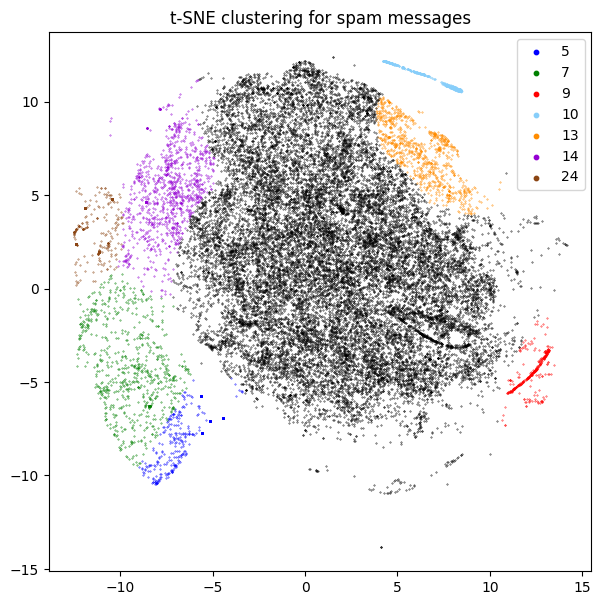

In [ ]:
draw_plot2(spam_tsne, 'tsne_0', 'tsne_1', tsne_label, tsne_chosen)

In [ ]:

df['tsne_label'] = 0
df.loc[df['label'] == 1, 'tsne_label'] = tsne_label
df.head()

,label,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,tsne_0,tsne_1,tsne_label
66812,0,3.405352,-0.133571,0.022913,-0.656788,0.076587,-1.700207,-0.819912,0.225086,-0.306587,-0.567517,-0.105182,-0.090669,-0.012744,5.781015,-1.210747,0
26491,0,-6.135670,-0.950632,-1.297717,0.219088,0.041739,0.684836,0.246802,-0.349805,-0.559061,-0.274078,-0.342808,-0.085273,-0.018611,-8.229571,1.408012,0
56814,0,5.369586,0.137090,0.426693,-0.805127,0.490753,0.604057,-0.149051,0.276510,0.010877,0.378712,-0.531828,-0.469075,-0.354219,7.161136,0.790331,0
62888,0,2.679422,-1.730951,-1.150534,-0.729968,0.623516,-0.224546,-0.384776,0.615389,0.002588,-0.207686,-0.446293,-0.219902,-0.290937,2.301282,-4.524460,0
39233,0,1.892697,-1.829076,-0.262680,0.531497,-0.227475,0.394660,-0.851810,-0.221904,-0.278473,0.264628,-0.123632,-0.224816,-0.151866,1.837312,-2.223142,0


In [ ]:
mapping = dict( zip(tsne_chosen, [i for i in range(1, len(tsne_chosen)+1)]) )
df['tsne_label'] = df['tsne_label'].map(mapping).fillna(0)
df['tsne_label'] = df['tsne_label'].astype(int)

In [ ]:
df.loc[df['label'] == 1, 'tsne_label'].value_counts()

tsne_label
0    20594
6     1075
5      910
2      759
4      537
1      499
7      466
3      352
Name: count, dtype: int64

In [ ]:
df.drop(columns=['tsne_0', 'tsne_1'], inplace=True)

In [ ]:
df.head(10)

,label,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,tsne_label
66812,0,3.405352,-0.133571,0.022913,-0.656788,0.076587,-1.700207,-0.819912,0.225086,-0.306587,-0.567517,-0.105182,-0.090669,-0.012744,0
26491,0,-6.135670,-0.950632,-1.297717,0.219088,0.041739,0.684836,0.246802,-0.349805,-0.559061,-0.274078,-0.342808,-0.085273,-0.018611,0
56814,0,5.369586,0.137090,0.426693,-0.805127,0.490753,0.604057,-0.149051,0.276510,0.010877,0.378712,-0.531828,-0.469075,-0.354219,0
62888,0,2.679422,-1.730951,-1.150534,-0.729968,0.623516,-0.224546,-0.384776,0.615389,0.002588,-0.207686,-0.446293,-0.219902,-0.290937,0
39233,0,1.892697,-1.829076,-0.262680,0.531497,-0.227475,0.394660,-0.851810,-0.221904,-0.278473,0.264628,-0.123632,-0.224816,-0.151866,0
20822,0,-5.389646,3.332829,0.967394,0.117165,-0.750854,-0.582912,-0.023463,0.419763,-1.083928,0.361165,0.000736,0.112314,-0.375278,0
61671,0,2.241309,-2.221902,-2.160761,-0.064345,0.169406,0.212288,-0.205288,0.205123,0.033638,-0.249167,-0.078004,-0.433092,0.082195,0
47148,1,-10.557175,-2.493018,1.024009,-0.487310,0.055887,0.334180,0.256474,-0.161022,0.182246,-0.413958,0.081895,-0.246571,-0.066147,0
43650,1,-5.406229,4.213736,0.259514,-0.418183,-0.943006,-0.799873,1.729767,1.050073,-0.842291,0.731470,-0.353122,0.222093,0.092622,6
66285,1,8.848545,0.242606,-0.019941,-0.786166,-0.301798,0.228964,1.535188,-0.439300,0.055125,0.168459,0.583647,-0.818555,-0.080165,0


In [ ]:
df.to_parquet('processed_pca.parquet')